<a href="https://colab.research.google.com/github/yanwe1/PGSS2023/blob/main/TextAnalysis_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import dataset after copying it to the local VM

In [ ]:
!cp -r /content/gdrive/MyDrive/PGSS\ 2023/PGSS2023/Week02/IMDB\ Dataset.csv /content/

cp: cannot stat '/content/gdrive/MyDrive/PGSS 2023/PGSS2023/Week02/IMDB Dataset.csv': Transport endpoint is not connected


In [ ]:
import pandas as pd
df = pd.read_csv('/content/IMDB Dataset.csv')

In [ ]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#Learn to classify the text based on the sentiment response

#Cleanse the text data to remove things that wouldn't have any bearing on sentiment

In [ ]:
# Convert all words to lowercase
df["review"] = df["review"].str.lower()

# Remove HTML tags using Beautiful soup
from bs4 import BeautifulSoup
df["review"] = df["review"].apply(lambda review: BeautifulSoup(review, "lxml").text)

# Remove urls
# From https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
import re
df["review"] = df["review"].apply(lambda review: re.sub(r'^https?:\/\/.*[\r\n]*', '', review, flags=re.MULTILINE))

df.head()

!pip install contractions
# Remove Contractions
import contractions
df["review"] = df["review"].apply(lambda review: contractions.fix(review))

<ipython-input-38-7ab508f3cac7>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df["review"] = df["review"].apply(lambda review: BeautifulSoup(review, "lxml").text)


In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


#Create word clouds to get a birds-eye view of the data given

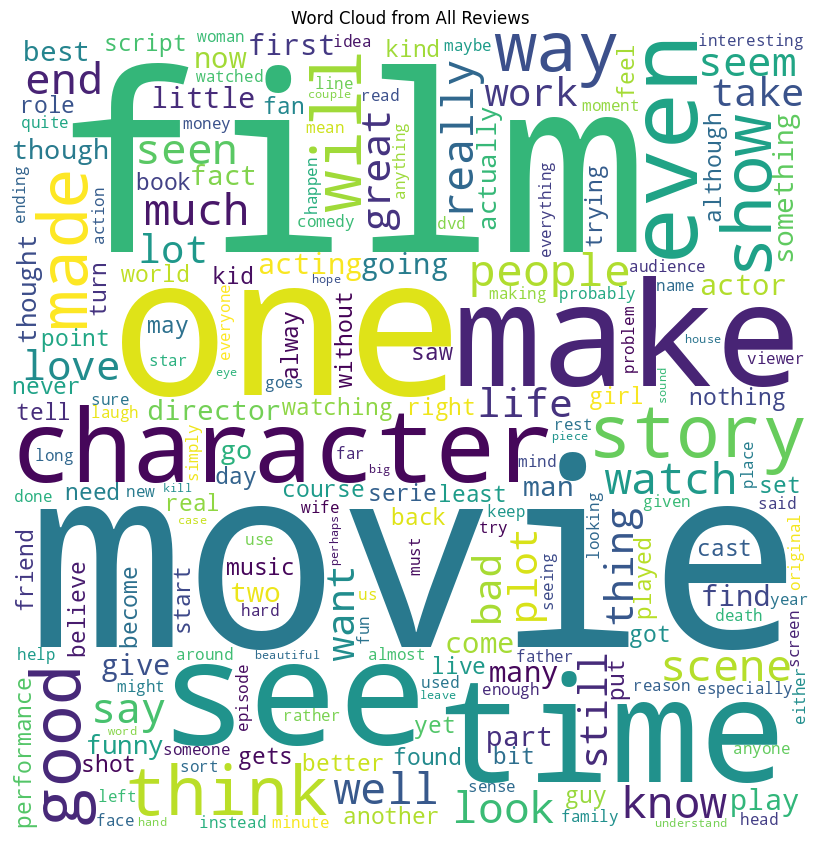

In [ ]:
#Create Word Cloud
from wordcloud import WordCloud, STOPWORDS

all_reviews = " "
positive_reviews = " "
negative_reviews =  ""

stopwords = set(STOPWORDS)


positive_df = df[df["sentiment"]  == "positive"]
negative_df = df[df["sentiment"]  == "negative"]

for review in positive_df.review:
    # Tokenize the review
    tokens = review.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    all_reviews += " ".join(tokens)+" "
    positive_reviews  += " ".join(tokens)+" "

for review in negative_df.review:
    # Tokenize the review
    tokens = review.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    all_reviews += " ".join(tokens)+" "
    negative_reviews  += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_reviews)
# plot the WordCloud image

import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Word Cloud from All Reviews")
plt.show()

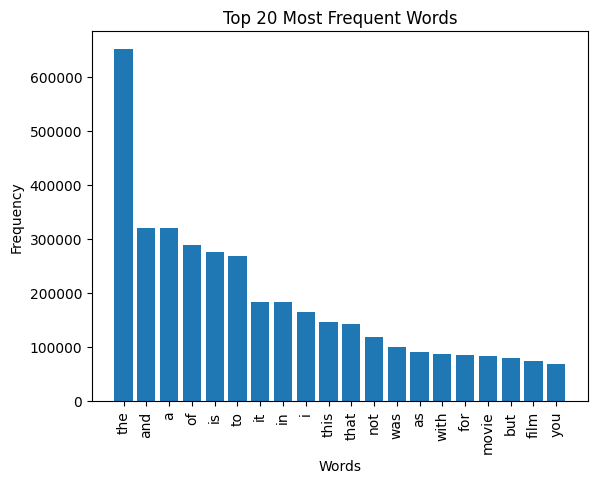

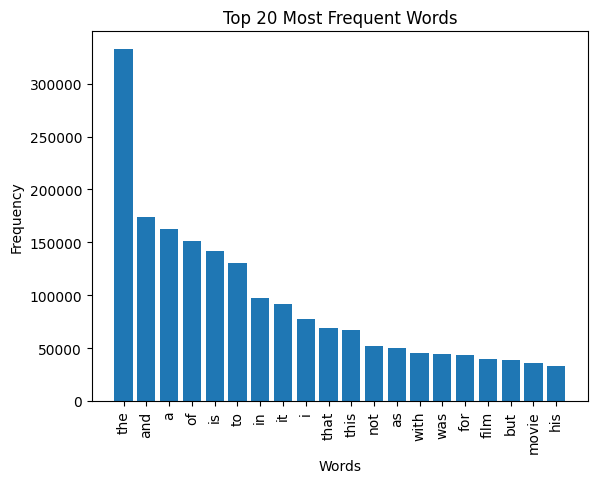

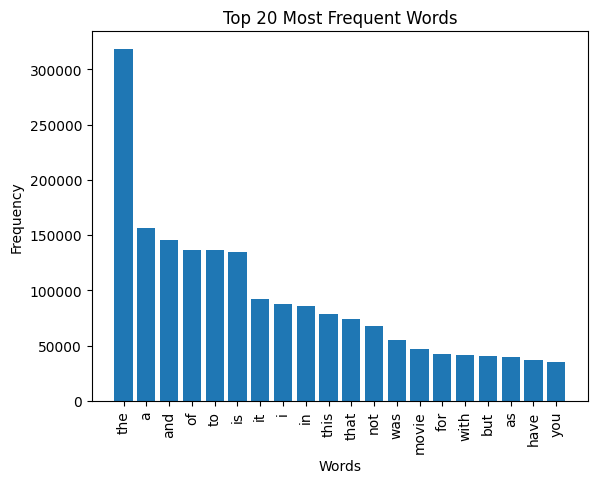

In [ ]:
import re
from collections import Counter
import matplotlib.pyplot as plt


def create_barplot(string, k):
    # Step 1: Convert string to list of words
    words = string.split()

    # Step 2: Remove punctuation and special characters
    words = [re.sub(r'[^\w\s]', '', word) for word in words]

    # Step 3: Convert all words to lowercase
    words = [word.lower() for word in words]

    # Step 4: Count frequency of each word using dictionary
    word_counts = Counter(words)

    # Step 5: Sort dictionary by value in descending order and limit to top k
    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:k])

    # Step 6: Create barplot using matplotlib
    plt.bar(sorted_word_counts.keys(), sorted_word_counts.values())
    plt.xticks(rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {k} Most Frequent Words')
    plt.show()
k = 20

create_barplot(all_reviews, k)
create_barplot(positive_reviews, k)
create_barplot(negative_reviews, k)

In [ ]:
# Define a function to count the number of words in a string
def count_words(text):
    return len(text.split())

# Apply the function to the reviews column using apply method
df['num_words'] = df['review'].apply(count_words)

# Create a new column in the dataframe with the number of words
df.head()

,review,sentiment,num_words
0,one of the other reviewers has mentioned that ...,positive,308
1,a wonderful little production. the filming tec...,positive,156
2,i thought this was a wonderful way to spend ti...,positive,164
3,basically there is a family where a little boy...,negative,135
4,"petter mattei's ""love in the time of money"" is...",positive,222


<Axes: xlabel='num_words', ylabel='Count'>

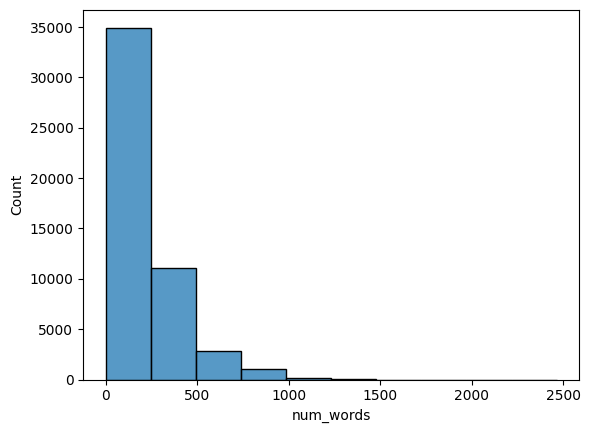

In [ ]:
import seaborn as sns

sns.histplot(data=df, x='num_words', bins=10)

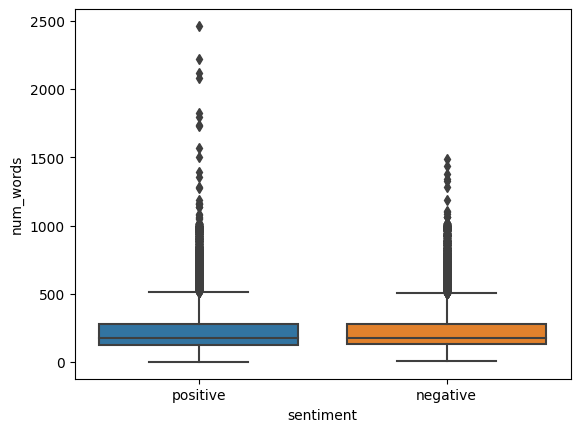

In [ ]:
#  Create a grouped boxplot using seaborn's boxplot function
sns.boxplot(data=df, x='sentiment', y='num_words')

# Display the plot
plt.show()

#Create new numerical features in addition to the number of words using sentence transformersto embed the text into fixed-length numerical representations

In [ ]:
! pip install sentence-transformers

In [ ]:
# Create a stratified random sample of df
strata = df['sentiment'].unique()

# Calculate the size of the sample for each stratum
sample_size = 100
sample_sizes = {s: sample_size for s in strata}

# Use pandas' groupby method to group the dataframe by the sentiment column
groups = df.groupby('sentiment')

# Use pandas' apply method to sample each group based on the size of the sample for that stratum
samples = groups.apply(lambda x: x.sample(n=sample_sizes[x.name])).reset_index(drop=True)

# Concatenate the sampled groups into a single dataframe
sampled_df = pd.concat([samples])

sampled_df

,review,sentiment,num_words
0,after i saw this i concluded that it was most ...,negative,319
1,"being a huge horror movie fan, one of the most...",negative,237
2,oh where to begin. the cinematography was grea...,negative,197
3,here is another great film critics will love. ...,negative,358
4,i am a regular reader of kathy reichs' tempera...,negative,258
...,...,...,...
195,i was given a dvd of public enemies and was ex...,positive,570
196,"first of all, those who are faint at heart sho...",positive,397
197,"if you like the 80's rock, you should definite...",positive,235
198,the world of the dragon hunters is a 3d gravit...,positive,215


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer

# Load a pre-trained sentence transformer model
# model = SentenceTransformer('bert-base-nli-mean-tokens')
model = SentenceTransformer('bert-base-nli-mean-tokens', device='cuda')

# Define a function to embed the text using the sentence transformer model
def embed_text(text):
    embeddings = model.encode(text)
    return embeddings.tolist()

# Apply the function to the reviews column using apply method
sampled_df['embeddings'] = sampled_df['review'].apply(embed_text)

sampled_df

,review,sentiment,num_words,embeddings
0,after i saw this i concluded that it was most ...,negative,319,"[-0.10904079675674438, 0.5799078345298767, 0.0..."
1,"being a huge horror movie fan, one of the most...",negative,237,"[-0.030061084777116776, 1.161152720451355, -0...."
2,oh where to begin. the cinematography was grea...,negative,197,"[-0.33207306265830994, 0.7106958627700806, -0...."
3,here is another great film critics will love. ...,negative,358,"[-0.666520893573761, 0.7432467937469482, 0.147..."
4,i am a regular reader of kathy reichs' tempera...,negative,258,"[-0.47889459133148193, 1.0783367156982422, 0.2..."
...,...,...,...,...
195,i was given a dvd of public enemies and was ex...,positive,570,"[-0.17783863842487335, 0.47779637575149536, -0..."
196,"first of all, those who are faint at heart sho...",positive,397,"[0.0002019316889345646, 0.48808807134628296, 0..."
197,"if you like the 80's rock, you should definite...",positive,235,"[-0.3073244094848633, 0.5672711133956909, -0.0..."
198,the world of the dragon hunters is a 3d gravit...,positive,215,"[-0.5494011640548706, 1.299790620803833, -0.19..."


In [ ]:
df_embeddings = pd.DataFrame(list(sampled_df['embeddings']))

sampled_df = pd.concat([sampled_df, df_embeddings], axis=1)
sampled_df.drop(['embeddings'], axis=1, inplace=True)

# df_model = sampled_df[['num_words', 0, 1, ..., 767]]

sampled_df

,review,sentiment,num_words,0,1,2,3,4,5,6,...,758,759,760,761,762,763,764,765,766,767
0,after i saw this i concluded that it was most ...,negative,319,-0.109041,0.579908,0.010213,0.194654,-0.336639,0.232659,1.070334,...,-0.644574,-0.668211,-1.310469,-1.972579,0.051955,-0.071486,0.136160,0.228450,0.521498,0.435196
1,"being a huge horror movie fan, one of the most...",negative,237,-0.030061,1.161153,-0.216758,0.275401,-0.347196,-0.791676,1.271095,...,-0.260046,-0.206500,-0.715902,-1.747892,-0.155274,-0.440088,0.134556,0.025640,0.628843,0.328734
2,oh where to begin. the cinematography was grea...,negative,197,-0.332073,0.710696,-0.223930,0.415928,-0.111974,-0.644842,1.132064,...,-0.597665,-0.463119,-1.591963,-1.523208,0.033268,-0.166759,0.148353,0.359655,0.280911,0.437912
3,here is another great film critics will love. ...,negative,358,-0.666521,0.743247,0.147741,0.277423,-0.021601,-0.572828,1.194936,...,-0.482504,-0.827981,-1.355077,-1.669703,-0.146818,-0.298988,0.102465,0.048170,0.300790,0.150413
4,i am a regular reader of kathy reichs' tempera...,negative,258,-0.478895,1.078337,0.237219,-0.175741,-0.343229,-0.204033,1.398382,...,-0.667409,-0.697623,-1.433976,-1.801823,-0.085744,-0.963486,-0.144658,0.347727,0.366484,-0.037673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,i was given a dvd of public enemies and was ex...,positive,570,-0.177839,0.477796,-0.128016,0.361560,-0.195071,-0.581143,1.182148,...,-0.182546,-0.250330,-0.810780,-1.618310,-0.076964,-0.065528,-0.094199,0.722958,0.342571,0.126407
196,"first of all, those who are faint at heart sho...",positive,397,0.000202,0.488088,0.774920,0.101191,-0.530680,-0.651785,1.918571,...,-0.125620,-0.346916,-0.741585,-1.972676,-0.238156,-0.089787,-0.221862,0.174365,-0.175603,0.048427
197,"if you like the 80's rock, you should definite...",positive,235,-0.307324,0.567271,-0.030246,-0.012826,-0.189838,-1.623367,0.484960,...,-0.106287,-1.597589,-0.930938,-2.192416,0.172969,-0.296567,-0.120736,0.444304,0.866535,-0.111927
198,the world of the dragon hunters is a 3d gravit...,positive,215,-0.549401,1.299791,-0.190239,0.497799,-0.450300,-0.748984,0.444585,...,-0.735334,0.544317,-0.612893,-1.214064,-0.339748,-0.599800,-0.021051,-0.020710,0.709427,-0.169485


In [ ]:
modelReadDataset = sampled_df.drop(['review'], axis=1)
modelReadDataset = modelReadDataset.drop(['num_words'], axis=1)
modelReadDataset['sentiment'] = modelReadDataset['sentiment'].astype('category')
modelReadDataset

,sentiment,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,negative,-0.109041,0.579908,0.010213,0.194654,-0.336639,0.232659,1.070334,-0.087978,0.684895,...,-0.644574,-0.668211,-1.310469,-1.972579,0.051955,-0.071486,0.136160,0.228450,0.521498,0.435196
1,negative,-0.030061,1.161153,-0.216758,0.275401,-0.347196,-0.791676,1.271095,0.357866,0.641850,...,-0.260046,-0.206500,-0.715902,-1.747892,-0.155274,-0.440088,0.134556,0.025640,0.628843,0.328734
2,negative,-0.332073,0.710696,-0.223930,0.415928,-0.111974,-0.644842,1.132064,-0.289497,0.470725,...,-0.597665,-0.463119,-1.591963,-1.523208,0.033268,-0.166759,0.148353,0.359655,0.280911,0.437912
3,negative,-0.666521,0.743247,0.147741,0.277423,-0.021601,-0.572828,1.194936,0.075900,0.310133,...,-0.482504,-0.827981,-1.355077,-1.669703,-0.146818,-0.298988,0.102465,0.048170,0.300790,0.150413
4,negative,-0.478895,1.078337,0.237219,-0.175741,-0.343229,-0.204033,1.398382,0.092302,0.538813,...,-0.667409,-0.697623,-1.433976,-1.801823,-0.085744,-0.963486,-0.144658,0.347727,0.366484,-0.037673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,positive,-0.177839,0.477796,-0.128016,0.361560,-0.195071,-0.581143,1.182148,0.452138,0.365235,...,-0.182546,-0.250330,-0.810780,-1.618310,-0.076964,-0.065528,-0.094199,0.722958,0.342571,0.126407
196,positive,0.000202,0.488088,0.774920,0.101191,-0.530680,-0.651785,1.918571,0.062704,0.711782,...,-0.125620,-0.346916,-0.741585,-1.972676,-0.238156,-0.089787,-0.221862,0.174365,-0.175603,0.048427
197,positive,-0.307324,0.567271,-0.030246,-0.012826,-0.189838,-1.623367,0.484960,0.000061,0.672730,...,-0.106287,-1.597589,-0.930938,-2.192416,0.172969,-0.296567,-0.120736,0.444304,0.866535,-0.111927
198,positive,-0.549401,1.299791,-0.190239,0.497799,-0.450300,-0.748984,0.444585,0.178038,0.205736,...,-0.735334,0.544317,-0.612893,-1.214064,-0.339748,-0.599800,-0.021051,-0.020710,0.709427,-0.169485


#Classify the text after converting the response variable into a categorical type

In [ ]:
# Create a decision tree to classify sentiment using the remaining columns of modelReadDataset

from sklearn.model_selection import train_test_split

X = modelReadDataset.drop('sentiment', axis=1)
y = modelReadDataset['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn import metrics

y_pred = dt_classifier.predict(X_test)

print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# print('Precision:', metrics.precision_score(y_test, y_pred))
# print('Recall:', metrics.recall_score(y_test, y_pred))
# print('F1 Score:', metrics.f1_score(y_test, y_pred))

Accuracy: 0.775


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=['negative', 'positive'])
print(report)

              precision    recall  f1-score   support

    negative       0.83      0.71      0.77        21
    positive       0.73      0.84      0.78        19

    accuracy                           0.78        40
   macro avg       0.78      0.78      0.77        40
weighted avg       0.78      0.78      0.77        40



#Save the trained model and the ready dataset that was used to build the model

In [ ]:
## Save dt_classifier to a pkl file for loading later
import pickle

with open('/content/drive/MyDrive/PGSS 2023/Y_Week #2/dt_model.pkl', 'wb') as f:
  pickle.dump(dt_classifier, f)

# modelReadDataset

with open('/content/drive/MyDrive/PGSS 2023/Y_Week #2/dt_model.pkl', 'wb') as f:
    pickle.dump(dt_classifier, f)


#Instead of training a descision tree, lets train a simple fully-connected neural network to do the same task and see if if performs better or worse than the descision tree

In [ ]:
modelReadDataset.shape

(200, 769)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assume X_train is your feature matrix and Y_train is your target variable

from sklearn.model_selection import train_test_split

X = modelReadDataset.drop('sentiment', axis=1)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(modelReadDataset['sentiment'])

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()

# Add the first hidden layer
model.add(Dense(265, activation='relu', input_shape=(768,)))

# Add the second hidden layer
model.add(Dense(128, activation='relu'))

# Add the third hidden layer
model.add(Dense(68, activation='relu'))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

#Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit the model
model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=1)




Epoch 1/10
5/5 [==============================] - 3s 6ms/step - loss: 0.7008 - accuracy: 0.5562
Epoch 2/10
5/5 [==============================] - 0s 6ms/step - loss: 0.5434 - accuracy: 0.7312
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 0.4477 - accuracy: 0.7812
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 0.3688 - accuracy: 0.8375
Epoch 5/10
5/5 [==============================] - 0s 6ms/step - loss: 0.3288 - accuracy: 0.8750
Epoch 6/10
5/5 [==============================] - 0s 6ms/step - loss: 0.3011 - accuracy: 0.8562
Epoch 7/10
5/5 [==============================] - 0s 6ms/step - loss: 0.2419 - accuracy: 0.9125
Epoch 8/10
5/5 [==============================] - 0s 6ms/step - loss: 0.1820 - accuracy: 0.9438
Epoch 9/10
5/5 [==============================] - 0s 7ms/step - loss: 0.1349 - accuracy: 0.9688
Epoch 10/10
5/5 [==============================] - 0s 5ms/step - loss: 0.0968 - accuracy: 0.9937


In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 265)               203785    
                                                                 
 dense_53 (Dense)            (None, 128)               34048     
                                                                 
 dense_54 (Dense)            (None, 68)                8772      
                                                                 
 dense_55 (Dense)            (None, 1)                 69        
                                                                 
Total params: 246,674
Trainable params: 246,674
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Assume that X_test is your new dataset
predictions = model.predict(X_test)

# Convert probabilities into class labels
class_predictions = ['positive' if x > 0.5 else 'negative' for x in predictions]

# class_predictions

2/2 [==============================] - 0s 6ms/step


In [ ]:
from sklearn import metrics

print('Accuracy:', metrics.accuracy_score(Y_test, le.fit_transform(class_predictions)))

Accuracy: 0.75


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, le.fit_transform(class_predictions), target_names=['negative', 'positive'])
print(report)

              precision    recall  f1-score   support

    negative       0.79      0.71      0.75        21
    positive       0.71      0.79      0.75        19

    accuracy                           0.75        40
   macro avg       0.75      0.75      0.75        40
weighted avg       0.75      0.75      0.75        40



#Running inference on out-of-sample data

#Load the model

In [ ]:
# Load the model from the pkl file
import pickle


with open('/content/drive/MyDrive/PGSS 2023/Y_Week #2/dt_model.pkl', 'rb') as f:
    dt_classifier = pickle.load(f)

dt_classifier

DecisionTreeClassifier(random_state=42)

#Read the new data

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('PGSS2023').get_worksheet(5) #CrowdSourcedSentimentData

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
newDf = pd.DataFrame.from_records(rows[1:])

newDf.columns = rows[0]

#Make the words in "sentiment" column lower case

newDf

[['Name', 'review', 'sentiment'], ['Parth Parikh', 'On Saturday, friends and I went to the Kennywood amusement park and enjoyed riding various roller coasters. After returning, I had a great time continuing to hang out on campus.', 'Positive'], ['Ben Nguyen', 'We cheated at the Arcade and lost $60', 'Negative'], ['Felix Yang', 'We went to Kennywood, it was fun and great', 'Positive'], ['Sooraj Tharumia', 'We got Github CoPilot to install on the local development environment.', 'Positive'], ['Helen Mao', "I can't escape the country accent.", 'Negative'], ['Kamya Rajesh', 'I slept in, watched a movie, had boba, and walked around with my friends.', 'Positive'], ['Yanwei Liu', 'I walked with friends to a crepe shop, but it was closed. We were so sad.', 'Negative'], ['Olina Mukherjee', 'we made Mega Bed and had a sleepover with 10 people in one AC-ed room, it was fun', 'Positive'], ['Lihini Ranaweera', 'My friends and I went to Kennywood and had fun. We decorated a cake and enjoyed it. ', '

,Name,review,sentiment
0,Parth Parikh,"On Saturday, friends and I went to the Kennywo...",Positive
1,Ben Nguyen,We cheated at the Arcade and lost $60,Negative
2,Felix Yang,"We went to Kennywood, it was fun and great",Positive
3,Sooraj Tharumia,We got Github CoPilot to install on the local ...,Positive
4,Helen Mao,I can't escape the country accent.,Negative
5,Kamya Rajesh,"I slept in, watched a movie, had boba, and wal...",Positive
6,Yanwei Liu,"I walked with friends to a crepe shop, but it ...",Negative
7,Olina Mukherjee,we made Mega Bed and had a sleepover with 10 p...,Positive
8,Lihini Ranaweera,My friends and I went to Kennywood and had fun...,Positive
9,Kofi Anokye,Slept more than 6 hours,Positive


#Engineer features

In [ ]:
#Define a function to count the number of words in a string
def count_words(text):
    return len(text.split())

# Apply the function to the reviews column using apply method
newDf['num_words'] = newDf['review'].apply(count_words)

newDf["review"] = newDf["review"].str.lower()

#newDf.rename(columns={'num_words': 761}, inplace=True)

import pandas as pd
from sentence_transformers import SentenceTransformer

# Load a pre-trained sentence transformer model
# model = SentenceTransformer('bert-base-nli-mean-tokens')
model = SentenceTransformer('bert-base-nli-mean-tokens', device='cuda')

# Define a function to embed the text using the sentence transformer model
def embed_text(text):
    embeddings = model.encode(text)
    return embeddings.tolist()

# Apply the function to the reviews column using apply method
newDf['embeddings'] = newDf['review'].apply(embed_text)

df_embeddings = pd.DataFrame(list(newDf['embeddings']))

newDf = pd.concat([newDf, df_embeddings], axis=1)
newDf.drop(['embeddings'], axis=1, inplace=True)

# Make the words in "sentiment" column lower-case
newDf["review"] = newDf["review"].str.lower()
newDf["sentiment"] = newDf["sentiment"].str.lower()

newDf

,Name,review,sentiment,num_words,0,1,2,3,4,5,...,758,759,760,761,762,763,764,765,766,767
0,Parth Parikh,"on saturday, friends and i went to the kennywo...",positive,30,-0.236651,-0.411669,1.803870,0.502376,0.056640,-1.442143,...,-0.458309,-1.342463,-1.151225,-0.869811,0.571280,-2.087172,-0.119997,0.238306,-0.044361,-0.240646
1,Ben Nguyen,we cheated at the arcade and lost $60,negative,8,0.171415,0.616539,-0.202054,0.811134,0.370447,0.262969,...,-0.315388,0.073051,-0.770700,-0.399417,1.135651,-0.010402,-0.308450,-0.420459,0.444750,0.080028
2,Felix Yang,"we went to kennywood, it was fun and great",positive,9,0.093172,-0.034284,1.983440,0.138529,-0.225989,-1.127789,...,-0.410948,-1.585070,-0.316526,-1.516949,-0.136290,-1.147071,-0.361482,0.407926,0.064288,-0.198978
3,Sooraj Tharumia,we got github copilot to install on the local ...,positive,11,0.401379,0.230450,1.246814,0.516489,0.259700,-0.140194,...,-0.546583,-0.560267,-1.407246,-0.154892,0.023543,-0.709044,-0.427847,-0.272633,-0.581324,0.216744
4,Helen Mao,i can't escape the country accent.,negative,6,0.092309,0.296268,1.460296,0.507051,0.305698,0.545499,...,-0.626227,-0.733478,0.323088,-0.601730,-0.092325,-1.092104,0.505501,0.729472,-0.260707,0.409460
5,Kamya Rajesh,"i slept in, watched a movie, had boba, and wal...",positive,14,0.510924,0.689157,1.570543,-0.377628,-0.166212,-0.482224,...,0.023850,-0.709443,-0.617774,-0.527576,1.099379,-0.469343,0.315280,1.062005,0.983859,-0.243286
6,Yanwei Liu,"i walked with friends to a crepe shop, but it ...",negative,16,-0.165044,0.536896,1.078410,-0.229326,-0.227582,0.793055,...,0.080410,-1.047962,-1.118609,-1.558059,0.734870,-1.059605,-0.329513,0.827436,-0.415041,-0.183259
7,Olina Mukherjee,we made mega bed and had a sleepover with 10 p...,positive,18,-0.143872,0.736027,0.037365,0.281454,0.494500,-1.076953,...,-0.851258,-1.161659,-0.581674,-0.447503,0.525668,-0.141608,0.625408,0.104810,1.221338,-0.424296
8,Lihini Ranaweera,my friends and i went to kennywood and had fun...,positive,17,-0.505824,0.684451,0.988027,-0.128968,-0.839170,-0.631768,...,-0.923227,-2.282973,-0.839400,-1.330241,0.308691,-0.934405,0.053562,0.271991,-0.229564,0.242981
9,Kofi Anokye,slept more than 6 hours,positive,5,0.568165,-0.146791,0.744467,0.358526,0.210618,-0.448313,...,0.404829,0.027615,0.257842,0.187654,1.013081,-0.407390,-0.252731,-0.399876,0.951630,-0.782845


#Evaluate trained model on new data

In [ ]:
from sklearn import metrics

y_pred = dt_classifier.predict(newDf.drop(['sentiment','Name','review', 'num_words'], axis=1))

print('Accuracy:', metrics.accuracy_score(newDf['sentiment'].values, y_pred))

Accuracy: 0.7058823529411765
